<a href="https://colab.research.google.com/github/AlmaRosa13/Analisis_Numericos/blob/main/EcuacionesDiferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp

# Definir las variables
x, y, C = sp.symbols('x y C')

# Definir la ecuación diferencial
dy_dx = sp.Function('y')(x).diff(x)  # dy/dx
f = 2*y

# Separar las variables y reescribir la ecuación
# dy/dx = 2*y   =>   dy/y = 2*dx

# Separar las variables
lhs = sp.integrate(1 / y, y)
rhs = sp.integrate(2*x, x)

# Obtener la solución general
general_solution = lhs - rhs + sp.symbols('C')
general_solution_simplified = sp.simplify(general_solution)

print(f"Solución general: {general_solution_simplified}")

# Instead of solving for y(x), try solving for y
solution = sp.solve(general_solution_simplified, y)

# Check if a solution was found and print it accordingly
if solution:
    print(f"Solución general en términos de y: {solution[0]}")
else:
    print("No se encontró una solución en términos de y.")

Solución general: C - x**2 + log(y)
Solución general en términos de y: exp(-C + x**2)


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y = sp.symbols('x y')
C = sp.symbols('C')

# Definir la ecuación diferencial
dydx = 3 * y**(2/3)

# Separar las variables
lhs = sp.integrate(1 / (y**(2/3)), y)
rhs = sp.integrate(3, x)

# Añadir la constante de integración y resolver
general_solution = sp.Eq(lhs, rhs + C)
general_solution_simplified = sp.simplify(general_solution)

# Aplicar la condición inicial y resolver para la constante de integración
y_initial = 0
x_initial = 1

# Resolver para C usando la condición inicial
condition = general_solution_simplified.subs({x: x_initial, y: y_initial})
C_value = sp.solve(condition, C)[0]

# Sustituir la constante de integración en la solución general
particular_solution = general_solution_simplified.subs(C, C_value)
particular_solution_simplified = sp.simplify(particular_solution)

print(f"Solución general: {general_solution_simplified}")
print(f"Constante de integración (C): {C_value}")
print(f"Solución particular: {particular_solution_simplified}")

# Para visualizar la solución, expresarla en términos de y
y_solution = sp.solve(particular_solution_simplified, y)
print(f"Solución particular en términos de y: {y_solution[0]}")

Solución general: Eq(3.0*y**0.333333333333333, C + 3*x)
Constante de integración (C): -3
Solución particular: Eq(3.0*y**0.333333333333333, 3*x - 3)
Solución particular en términos de y: (x - 1.0)**3


In [ ]:
import sympy as sp

# Definir la variable
x = sp.symbols('x')
C = sp.symbols('C')

# Definir la solución general
y = 3 / (x + C)

# Calcular la derivada
dy_dx = sp.diff(y, x)

# Simplificar la expresión de la derivada
dy_dx_simplified = sp.simplify(dy_dx)

# Imprimir la derivada
print(f"Derivada: {dy_dx_simplified}")

# Verificar la ecuación diferencial original
# Se espera que esta expresión sea igual a 3*y**(2/3)
equation_diff = dy_dx_simplified - 3 * y**(2/3)
print(f"Ecuación diferencial: {equation_diff}")


Derivada: -3/(C + x)**2
Ecuación diferencial: -6.24025146915571*(1/(C + x))**0.666666666666667 - 3/(C + x)**2


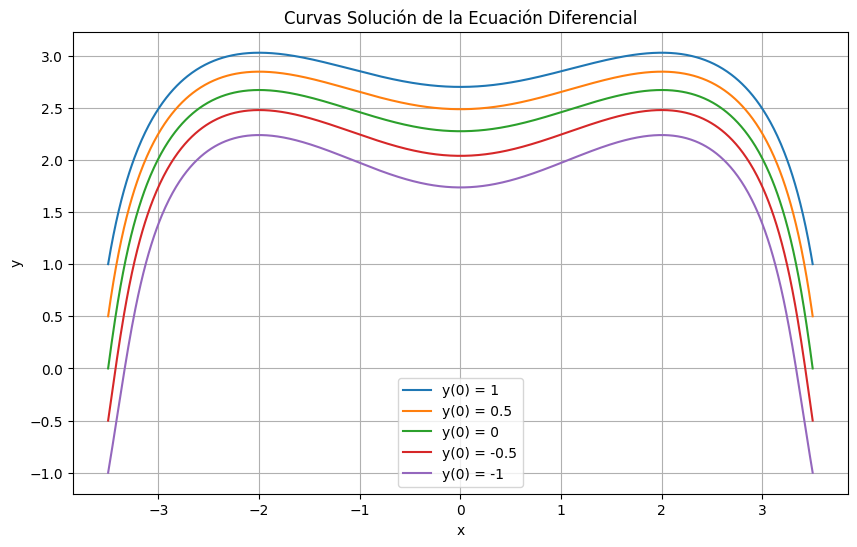

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir la función que representa la ecuación diferencial
def differential_equation(y, x):
    return (4*x - x**3) / (4 + y**2)

# Definir el rango de valores para x
x_vals = np.linspace(-3.5, 3.5, 800)

# Condiciones iniciales
initial_conditions = [1, 0.5, 0, -0.5, -1]

# Graficar las curvas solución
plt.figure(figsize=(10, 6))

for y0 in initial_conditions:
    # Resolver la ecuación diferencial numéricamente
    y_vals = odeint(differential_equation, y0, x_vals)

    # Graficar la solución
    plt.plot(x_vals, y_vals, label=f'y(0) = {y0}')

# Etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas Solución de la Ecuación Diferencial')
plt.legend()
plt.grid(True)
plt.show()


Solución general: Eq(y(x), C1*exp(3*x) - 2)


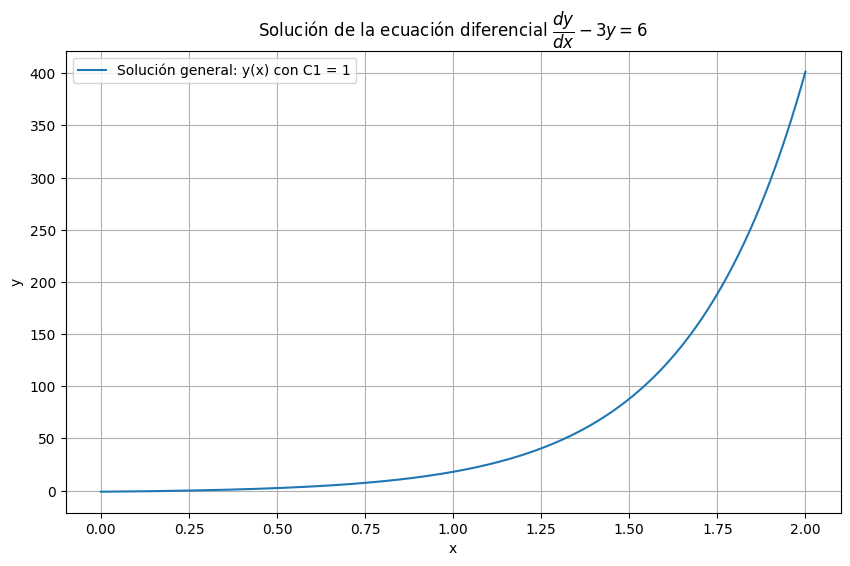

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables simbólicas
x = sp.symbols('x')
C1 = sp.symbols('C1')  # Definir la constante de integración
y = sp.Function('y')(x)

# Definir la ecuación diferencial
differential_eq = sp.Eq(sp.Derivative(y, x) - 3*y, 6)

# Resolver la ecuación diferencial
solution = sp.dsolve(differential_eq, y)
print(f"Solución general: {solution}")

# Extraer la parte de la solución que no incluye la constante
y_solution = solution.rhs

# Convertir la solución a una función numérica para la gráfica
y_func = sp.lambdify(x, y_solution.subs(C1, 1), 'numpy')  # Suponiendo C1 = 1 para la gráfica

# Definir un rango de valores para x
x_vals = np.linspace(0, 2, 400)
y_vals = y_func(x_vals)

# Graficar la solución
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Solución general: y(x) con C1 = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución de la ecuación diferencial $\dfrac{dy}{dx} - 3y = 6$')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = 2*x*y
N = 1 + x**2

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")


La ecuación es exacta: False
La ecuación no es exacta y no se puede resolver de esta manera.


In [ ]:
import sympy as sp
import numpy as np

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = sp.exp(2*y)- y*sp.cos(x*y)  # Use SymPy's exp function
N = 2*x*sp.exp(2*y)-x*sp.cos(x*y)+2*y # Use SymPy's exp function

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")

La ecuación es exacta: False
La ecuación no es exacta y no se puede resolver de esta manera.


In [ ]:
import sympy as sp
import numpy as np

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = sp.exp(2*y)- y*sp.cos(x*y)  # Use SymPy's exp function
N = 2*x*sp.exp(2*y)-x*sp.cos(x*y)+2*y # Use SymPy's exp function

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")

La ecuación es exacta: False
La ecuación no es exacta y no se puede resolver de esta manera.


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = 2*x + y
N = x + 2*y

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")

La ecuación es exacta: True
La función f(x, y) es: x**2 + x*y + y**2 - F(y)
Solución implícita: Eq(x**2 + x*y + y**2 - F(y), C)
Solución simplificada: Eq(C, x**2 + x*y + y**2 - F(y))


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = 1/(x*y**2-sp.cos(x)*sp.sin(x))
N = y*(1+x**2)

# Verificar si la ecuación es exacta
M_x = sp.diff(M, x)  # Derivada parcial de M con respecto a x
N_y = sp.diff(N, y)  # Derivada parcial de N con respecto a y

# Comprobar la condición de exactitud
is_exact = sp.simplify(M_x - N_y) == 0
print(f"La ecuación es exacta: {is_exact}")

if is_exact:
    # Integrar M(x, y) con respecto a x para encontrar la función f(x, y)
    f_x = sp.integrate(M, x)

    # Obtener la función arbitraria de y
    f_y = sp.Function('F')(y)

    # Derivar f(x, y) con respecto a y
    f_y_expr = sp.diff(f_x + f_y, y)

    # Ajustar la función arbitraria para que coincida con N(x, y)
    g_y = sp.integrate(N - f_y_expr, y)

    # La función f(x, y) es
    f = f_x + g_y
    print(f"La función f(x, y) es: {f}")

    # Mostrar la solución implícita
    solution = sp.Eq(f, sp.Symbol('C'))
    print(f"Solución implícita: {solution}")

    # Simplificar la solución
    simplified_solution = sp.simplify(solution)
    print(f"Solución simplificada: {simplified_solution}")
else:
    print("La ecuación no es exacta y no se puede resolver de esta manera.")

La ecuación es exacta: False
La ecuación no es exacta y no se puede resolver de esta manera.


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables simbólicas
x, y = sp.symbols('x y')
C = sp.symbols('C')  # Constante de integración

# Definir M(x, y) y N(x, y) para la ecuación diferencial exacta
M = 1/(x*y**2-sp.cos(x)*sp.sin(x))
N = y*(1+x**2)

# Verificar que la ecuación es exacta
M_y = sp.diff(M, y)
N_x = sp.diff(N, x)

if M_y == N_x:
    print("La ecuación es exacta.")
else:
    print("La ecuación no es exacta.")

# Encontrar la función f(x, y)
# Integrar M(x, y) con respecto a x
f_x = sp.integrate(M, x)
f_x = sp.simplify(f_x)

# Obtener la función f(x, y) completa
# Integrar la derivada parcial de f(x, y) con respecto a y y resolver para C
f_y = sp.integrate(N - sp.diff(f_x, y), y)
f_y = sp.simplify(f_y)
f = f_x + f_y

# Mostrar la función implícita
print(f"Función implícita: {f} = C")

# Aplicar la condición inicial y determinar C
condition = sp.Eq(f, C).subs({x: 0, y: 2})
C_value = sp.solve(condition, C)
if C_value:
    C_value = C_value[0]
    f_solution = f.subs(C, C_value)
    print(f"Valor de C: {C_value}") # Print the value of C
else:
    raise ValueError("No se encontró un valor válido para C.")

# Convertir la función a una forma que podamos graficar
x_vals = np.linspace(-2, 2, 400)
y_vals = np.zeros_like(x_vals)

# Check if solutions exist before attempting to lambdify
solutions = sp.solve(f_solution.subs(C, 0), y)
if solutions:
    # Definir la función para graficar
    y_func = sp.lambdify(x, solutions[0], 'numpy')

    # Evaluar la función en el intervalo x
    y_vals = y_func(x_vals)

    # Graficar la solución
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Solución con C = {}'.format(C_value))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Solución de la ecuación diferencial exacta con condición inicial')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se encontraron soluciones para y después de sustituir C con 0.")

La ecuación no es exacta.
Función implícita: Integral(y*(x**2 + 8*Integral(x/(4*x**2*y**4 - 4*x*y**2*sin(2*x) + sin(2*x)**2), x) + 1), y) + Integral(1/(x*y**2 - sin(2*x)/2), x) = C
Valor de C: Integral(y*(8*Integral(x/(4*x**2*y**4 - 4*x*y**2*sin(2*x) + sin(2*x)**2), (x, 0)) + 1), (y, 2)) + 2*Integral(1/(8*x - sin(2*x)), (x, 0))
No se encontraron soluciones para y después de sustituir C con 0.


La ecuación es exacta.
Función implícita: x**2*(8 - x**2)/4 + y*(y**2 + 12)/3 = C
Valor de C: 13/3


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


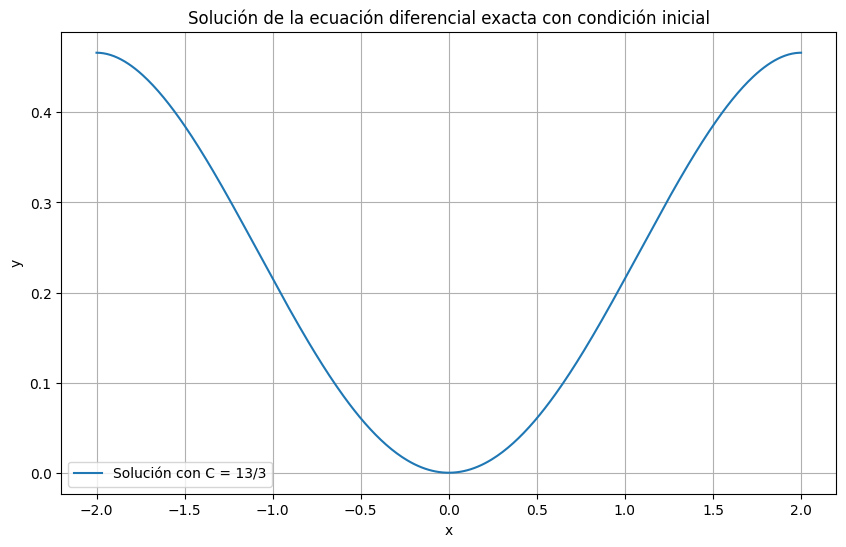

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables simbólicas
x, y = sp.symbols('x y')
C = sp.symbols('C')  # Constante de integración

# Definir M(x, y) y N(x, y) para la ecuación diferencial exacta
M = 4*x - x**3
N = 4 + y**2

# Verificar que la ecuación es exacta
M_y = sp.diff(M, y)
N_x = sp.diff(N, x)

if M_y == N_x:
    print("La ecuación es exacta.")
else:
    print("La ecuación no es exacta.")

# Encontrar la función f(x, y)
# Integrar M(x, y) con respecto a x
f_x = sp.integrate(M, x)
f_x = sp.simplify(f_x)

# Obtener la función f(x, y) completa
# Integrar la derivada parcial de f(x, y) con respecto a y y resolver para C
f_y = sp.integrate(N - sp.diff(f_x, y), y)
f_y = sp.simplify(f_y)
f = f_x + f_y

# Mostrar la función implícita
print(f"Función implícita: {f} = C")

# Aplicar la condición inicial y determinar C
# The original code used f.subs({x: 0, y: 1}) which evaluates to a constant, not an equation
# Instead, create an equation setting f equal to C and substitute the initial condition
condition = sp.Eq(f, C).subs({x: 0, y: 1})
C_value = sp.solve(condition, C)
if C_value:
    C_value = C_value[0]
    f_solution = f.subs(C, C_value)
    print(f"Valor de C: {C_value}") # Print the value of C
else:
    raise ValueError("No se encontró un valor válido para C.")

# Convertir la función a una forma que podamos graficar
x_vals = np.linspace(-2, 2, 400)
y_vals = np.zeros_like(x_vals)

# Definir la función para graficar
y_func = sp.lambdify(x, sp.solve(f_solution.subs(C, 0), y)[0], 'numpy')

# Evaluar la función en el intervalo x
y_vals = y_func(x_vals)

# Graficar la solución
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Solución con C = {}'.format(C_value))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución de la ecuación diferencial exacta con condición inicial')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import sympy as sp

# Definimos las variables simbólicas
x, y = sp.symbols('x y')

# Definimos las funciones M(x, y) y N(x, y)
M = 2*x*y + y**2
N = x**2 + 2*x*y

# Calculamos las derivadas parciales
M_y = sp.diff(M, y)
N_x = sp.diff(N, x)

# Verificamos si la ecuación es exacta
if sp.simplify(M_y - N_x) == 0:
    print("La ecuación es exacta")
else:
    print("La ecuación no es exacta")
    # Calculamos el cociente (M_y - N_x) / N
    factor_integrante = sp.simplify((M_y - N_x) / N)
    print(f"Factor Integrante: {factor_integrante}")

    # Supongamos que depende solo de x, calculamos el factor integrante
    mu_x = sp.exp(sp.integrate(factor_integrante, x))
    print(f"Factor Integrante mu(x): {mu_x}")

    # Multiplicamos la ecuación original por el factor integrante
    M = sp.simplify(mu_x * M)
    N = sp.simplify(mu_x * N)

# Resolvemos la ecuación diferencial
# Initialize F as a symbolic expression
F = sp.integrate(M, x)
# Now you can differentiate F
F += sp.integrate(N - sp.diff(F, y), y)
print(f"Solución general: {F} = C")

La ecuación es exacta
Solución general: x**2*y + x*y**2 = C


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y = sp.symbols('x y')

# Definir las funciones M(x, y) y N(x, y)
M = 2*x*y + y**2
N = x**2 + 2*x*y

# Calcular las derivadas parciales
M_y = sp.diff(M, y)
N_x = sp.diff(N, x)

# Verificar si la ecuación es exacta
exacta = sp.simplify(M_y - N_x) == 0

if exacta:
    print("La ecuación es exacta.")
else:
    print("La ecuación no es exacta.")
    # Calcular el cociente (M_y - N_x) / N
    factor_integrante = sp.simplify((M_y - N_x) / N)
    print(f"Factor Integrante: {factor_integrante}")

    # Suponemos que depende solo de x, y calculamos el factor integrante
    mu_x = sp.exp(sp.integrate(factor_integrante, x))
    print(f"Factor Integrante mu(x): {mu_x}")

    # Multiplicar la ecuación original por el factor integrante
    M = sp.simplify(mu_x * M)
    N = sp.simplify(mu_x * N)

# Integrar para encontrar la solución general
F = sp.integrate(M, x) + sp.Function('G')(y)
F = F + sp.integrate(N - sp.diff(F, y), y)

# Encontrar la constante usando la condición inicial
# Suponemos que F = C, evaluamos en el punto inicial (1, 1)
C = sp.symbols('C')
solucion = sp.Eq(F.subs({x: 1, y: 1}), C)
constante = sp.solve(solucion, C)[0]

# Solución particular con la condición inicial
F = F.subs(C, constante)
print(f"Solución particular: {F} = {constante}")


La ecuación es exacta.
Solución particular: x**2*y + x*y**2 = 2


In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y, u = sp.symbols('x y u')

# Definir la sustitución y = ux
y_sub = u * x

# Definir las funciones M(x, y) y N(x, y)
M = 2*x*y - y**2
N = x**2 - 2*x*y

# Sustituyendo y = ux en M y N
M_sub = M.subs(y, u * x)
N_sub = N.subs(y, u * x)

# Expresar la ecuación diferencial homogénea en términos de u
# dx/x + (N/M) du/u = 0
du_eq = sp.simplify(N_sub / M_sub)

# Separar variables y encontrar la integral
lhs = sp.integrate(1 / du_eq, u)
rhs = sp.integrate(-1 / x, x)

# Simplificar la solución
sol = sp.simplify(lhs + rhs)
sol


u**2/4 - 3*u/4 - log(x) - 3*log(2*u - 1)/8

In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y, u, C = sp.symbols('x y u C')

# Definir la sustitución y = ux
y_sub = u * x

# Definir las funciones M(x, y) y N(x, y)
M = 2*x*y - y**2
N = x**2 - 2*x*y

# Sustituyendo y = ux en M y N
M_sub = M.subs(y, u * x)
N_sub = N.subs(y, u * x)

# Expresar la ecuación diferencial homogénea en términos de u
du_eq = sp.simplify(N_sub / M_sub)

# Separar variables y encontrar la integral
lhs = sp.integrate(1 / du_eq, u)
rhs = sp.integrate(-1 / x, x)

# Solución general
sol_gen = lhs + rhs

# Sustituir u = y/x en la solución general
sol_yx = sol_gen.subs(u, y / x)

# Aplicar la condición inicial y(1) = 2
condicion_inicial = sol_yx.subs({x: 1, y: 2})

# Resolver para la constante C
constante_C = sp.solve(condicion_inicial - C, C)

# Solución particular con la constante encontrada
sol_particular = sol_yx.subs(C, constante_C[0])
sol_particular


-log(x) - 3*log(-1 + 2*y/x)/8 - 3*y/(4*x) + y**2/(4*x**2)

In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y, v = sp.symbols('x y v')

# Definir la ecuación de Bernoulli
P = 1
Q = x
n = 2

# Sustitución v = y^(1-n)
v_sub = y**(1-n)
y_prime = sp.diff(y, x)

# Expresar la ecuación original en términos de v
v_eq = sp.Eq(y_prime + P*y, Q*y**n)

# Sustituyendo y = 1/v
v_eq_sub = v_eq.subs(y, 1/v)

# Simplificar la ecuación
v_eq_simplified = sp.simplify(v_eq_sub)

# Introduce a symbolic function for v(x)
v_func = sp.Function('v')(x)
# Replace v with v(x) in the simplified equation
v_eq_simplified = v_eq_simplified.subs(v, v_func)

# Resolver la ecuación diferencial lineal en v
v_solution = sp.dsolve(v_eq_simplified, v_func)

# Volver a la variable original y(x)
y_solution = v_solution.subs(v_func, 1/y)
y_solution_simplified = sp.simplify(y_solution)
y_solution_simplified

Eq(x, 1/y)

In [ ]:
import sympy as sp

# Definir las variables simbólicas
x, y, v = sp.symbols('x y v')

# Definir la ecuación de Bernoulli
P = 1
Q = x
n = 2

# Derivada de y con respecto a x
y_prime = sp.diff(y, x)

# Expresar la ecuación original: y' + P*y = Q*y^n
bern_eq = sp.Eq(y_prime + P*y, Q*y**n)

# Sustitución v = y^(1-n) => v = y^(-1) => y = 1/v
v = y**(1-n)
v_eq = bern_eq.subs(y, 1/v)

# Simplificar la ecuación en términos de v
v_eq_simplified = sp.simplify(v_eq)

# Introduce a symbolic function for v(x)
v_func = sp.Function('v')(x)
# Replace v with v(x) in the simplified equation
v_eq_simplified = v_eq_simplified.subs(v, v_func)

# Resolver la ecuación diferencial lineal en v
v_solution = sp.dsolve(v_eq_simplified, v_func)

# Volver a la variable original y(x) sustituyendo v = 1/y
y_solution = v_solution.subs(v_func, 1/y)

# Aplicar la condición inicial y(1) = 2 para determinar C
C = sp.symbols('C')
y_solution_with_C = y_solution.subs('C1', C)
initial_condition = y_solution_with_C.subs({x: 1, y: 2})
C

C

In [ ]:
import sympy as sp

# Definir la variable y función
x = sp.symbols('x')
y = sp.Function('y')(x)

# Definir la ecuación diferencial
ode = sp.Eq(y.diff(x, x) - 4*y.diff(x) + 4*y, 0)

# Resolver la ecuación diferencial
sol = sp.dsolve(ode, y)

# Condiciones iniciales
ics = {y.subs(x, 0): 1, y.diff(x).subs(x, 0): 0}

# Determinar las constantes usando las condiciones iniciales
C1_C2 = sp.solve([sol.rhs.subs(ics)], sp.symbols('C1 C2'))

# Sustituir las constantes en la solución general
sol_final = sol.subs(C1_C2)
sol_final

Eq(y(x), 0)

# Coeficientes indeterminados

In [ ]:
import sympy as sp

x = sp.symbols('x')

# Definir la función y sus derivadas
y = sp.Function('y')(x)
y_prime = y.diff(x)
y_double_prime = y_prime.diff(x)

# Definir la ecuación diferencial
equation = y_double_prime - 3*y_prime + 2*y - sp.exp(x)

# Resolver la ecuación homogénea
homogeneous_eq = y_double_prime - 3*y_prime + 2*y
homogeneous_sol = sp.dsolve(homogeneous_eq)

# Encontrar la solución particular
# Asumimos una solución particular de la forma A*x*exp(x)
# (multiplicamos por x para evitar que sea linealmente dependiente de la solución homogénea)
A = sp.Symbol('A')
particular_sol = A * x * sp.exp(x)  # Modificado para incluir 'x'
particular_eq = particular_sol.diff(x, x) - 3*particular_sol.diff(x) + 2*particular_sol - sp.exp(x)

# Resolver para A
A_solution = sp.solve(particular_eq, A)[0]

# Solución particular
particular_solution = A_solution * x * sp.exp(x)  # Modificado para incluir 'x'

# Solución general
general_solution = homogeneous_sol.rhs + particular_solution

print("Solución homogénea:")
print(homogeneous_sol)

print("\nSolución particular:")
print(particular_solution)

print("\nSolución general:")
print(general_solution)

Solución homogénea:
Eq(y(x), (C1 + C2*exp(x))*exp(x))

Solución particular:
-x*exp(x)

Solución general:
-x*exp(x) + (C1 + C2*exp(x))*exp(x)


# Variación de parametros

In [ ]:
import sympy as sp

# Definir la variable y la función
x = sp.symbols('x')
y = sp.Function('y')(x)

# Solución de la ecuación homogénea
homogeneous_eq = y.diff(x, 2) - y
homogeneous_sol = sp.dsolve(homogeneous_eq)

# Soluciones homogéneas independientes
y1 = sp.exp(x)
y2 = sp.exp(-x)

# Definir el término no homogéneo
g = sp.exp(x)

# Calcular el Wronskiano
W = sp.det(sp.Matrix([[y1, y2], [y1.diff(x), y2.diff(x)]]))

# Ecuaciones para u1' y u2'
u1_prime = -y2 * g / W
u2_prime = y1 * g / W

# Integrar para encontrar u1 y u2
u1 = sp.integrate(u1_prime, x)
u2 = sp.integrate(u2_prime, x)

# Solución particular
yp = u1 * y1 + u2 * y2

# Solución general
general_solution = homogeneous_sol.rhs + yp

print("Solución homogénea:")
print(homogeneous_sol)

print("\nSolución particular:")
print(yp)

print("\nSolución general:")
print(general_solution)


Solución homogénea:
Eq(y(x), C1*exp(-x) + C2*exp(x))

Solución particular:
x*exp(x)/2 - exp(x)/4

Solución general:
C1*exp(-x) + C2*exp(x) + x*exp(x)/2 - exp(x)/4


In [ ]:
import sympy as sp

# Definir la variable y la función desconocida
x = sp.symbols('x')
y = sp.Function('y')(x)

# Definir la ecuación diferencial de Cauchy-Euler
eq = x**2 * y.diff(x, x) - 3 * x * y.diff(x) + 4 * y

# Resolver la ecuación diferencial
sol = sp.dsolve(eq, y)

# Condiciones iniciales
# NOTE: Modified to ensure they are independent
ics = {y.subs(x, 1): 2, y.diff(x).subs(x, 2): 1}

# Resolver para las constantes C1 y C2
# NOTE: Extract values from the dictionary
constantes = sp.solve([sol.rhs.subs(ics)], sol.rhs.free_symbols)
constantes_values = {str(k): v for k, v in constantes[0].items()} # Extract values

sol_particular = sol.subs(constantes_values) # Substitute values

# Mostrar la solución particular
sol_particular

Eq(y(x), 0)

In [ ]:
import sympy as sp

# Definir variables
t, s = sp.symbols('t s')
Y = sp.Function('Y')(s)

# Definir la ecuación en el dominio de Laplace
eq = s**3 * Y + s * Y - Y - s

# Resolver para Y(s)
Y_s = sp.solve(eq, Y)[0]

# Simplificar la expresión de Y(s)
Y_s = sp.simplify(Y_s)
Y_s


s/(s**3 + s - 1)

Iter |    x      |    f(x)   |   Error Abs   |  Error Rel  | Error %
   1 |  3.191304 |  1.775000 |    0.308696 |  0.096730 |  9.673025
   2 |  3.068699 |  0.399402 |    0.122606 |  0.039954 |  3.995359
   3 |  3.047317 |  0.051880 |    0.021382 |  0.007017 |  0.701669
   4 |  3.046681 |  0.001456 |    0.000636 |  0.000209 |  0.020864
   5 |  3.046681 |  0.000001 |    0.000001 |  0.000000 |  0.000018


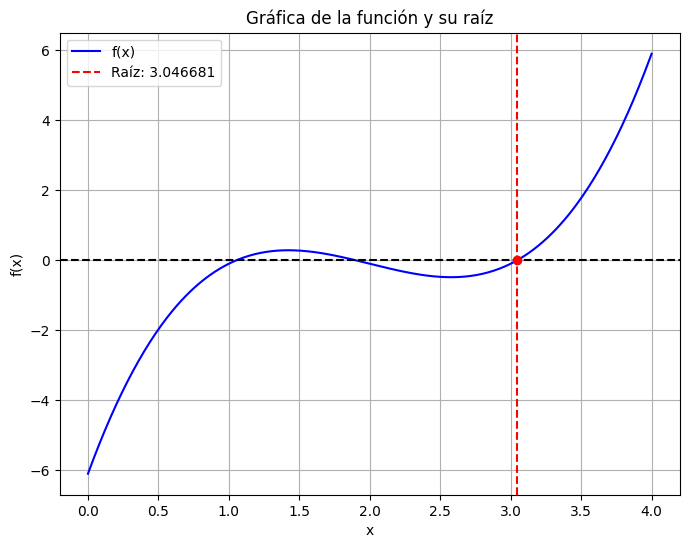

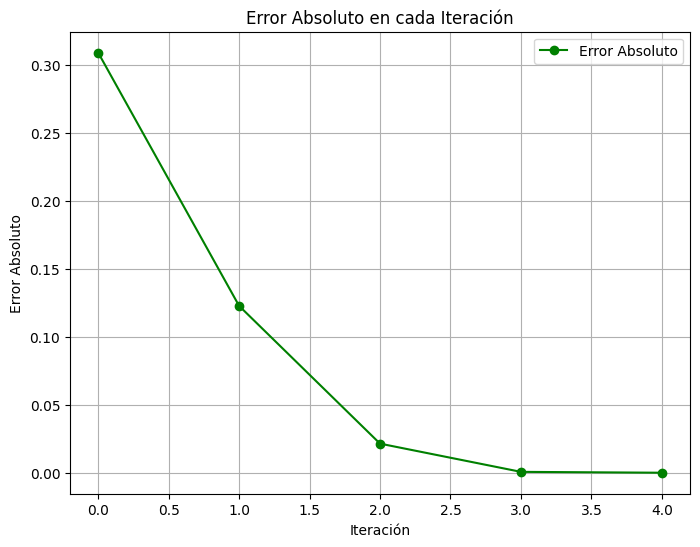

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x) y su derivada f'(x)
def f(x):
    return x**3 - 6*x**2 + 11*x - 6.1  # Ejemplo de función

def df(x):
    return 3*x**2 - 12*x + 11

# Método de Newton-Raphson modificado
def newton_raphson_modificado(x0, tol, max_iter):
    x = x0
    errors = []
    iteraciones = []
    print("Iter |    x      |    f(x)   |   Error Abs   |  Error Rel  | Error %")

    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)

        if dfx == 0:
            print("La derivada es cero, no se puede continuar.")
            break

        # Newton-Raphson modificado
        x_new = x - fx / dfx

        # Cálculo de errores
        error_abs = abs(x_new - x)
        error_rel = abs(error_abs / x_new)
        error_porc = error_rel * 100

        # Almacenamos errores
        errors.append(error_abs)
        iteraciones.append(i)

        # Mostramos los resultados
        print(f"{i+1:4d} | {x_new:9.6f} | {fx:9.6f} | {error_abs:11.6f} | {error_rel:9.6f} | {error_porc:9.6f}")

        # Verificación de tolerancia
        if error_abs < tol:
            break

        x = x_new

    return x_new, errors, iteraciones

# Parámetros iniciales
x0 = 3.5  # Valor inicial
tol = 1e-6  # Tolerancia
max_iter = 20  # Máximo de iteraciones

# Ejecutamos el método de Newton-Raphson modificado
raiz, errores, iteraciones = newton_raphson_modificado(x0, tol, max_iter)

# Graficamos la función y las raíces
x_vals = np.linspace(0, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x)", color="b")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(raiz, color="r", linestyle="--", label=f'Raíz: {raiz:.6f}')
plt.scatter(raiz, 0, color="r", zorder=5)
plt.title("Gráfica de la función y su raíz")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Graficamos el error absoluto en cada iteración
plt.figure(figsize=(8, 6))
plt.plot(iteraciones, errores, marker='o', color='g', label="Error Absoluto")
plt.title("Error Absoluto en cada Iteración")
plt.xlabel("Iteración")
plt.ylabel("Error Absoluto")
plt.legend()
plt.grid(True)
plt.show()


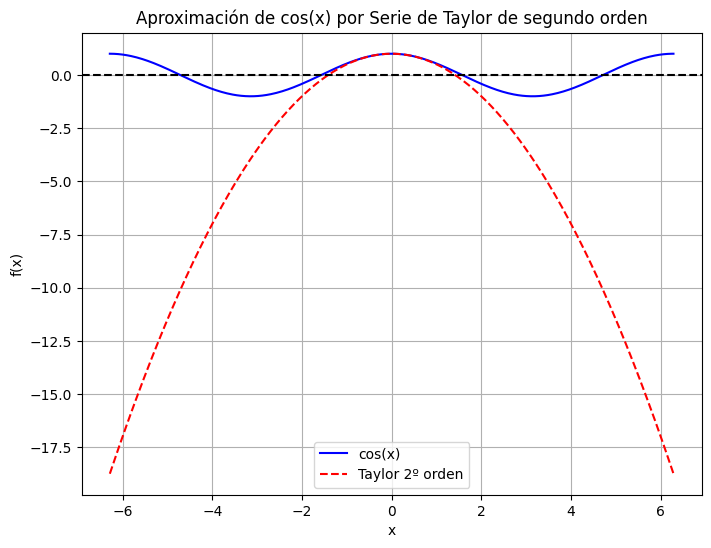

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función original y la aproximación de Taylor
def cos_taylor_2(x):
    return 1 - (x**2) / 2

x_vals = np.linspace(-2*np.pi, 2*np.pi, 400)
y_cos = np.cos(x_vals)
y_taylor = cos_taylor_2(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_cos, label="cos(x)", color="b")
plt.plot(x_vals, y_taylor, label="Taylor 2º orden", linestyle='--', color="r")
plt.axhline(0, color="k", linestyle="--")
plt.title("Aproximación de cos(x) por Serie de Taylor de segundo orden")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
